In [1]:
from mb_rag.basic import ModelFactory

In [2]:
llm = ModelFactory(model_name="gemini-3-pro-preview",model_type='google')
llm.invoke_query('What is the capital of France?')

[{'type': 'text',
  'text': 'The capital of France is **Paris**.',
  'extras': {'signature': 'EtMDCtADAdHtim/roq5as+V+tks8UmrvdNZFnhjuUU3ozwRdYwcIHc852Gomyu2mLUz+6J1QW/SEHAhADZdJlNEFcj5cBV1chfG2N8ARtwb2CGnA8GVYHUOkoWI1jzrHSLMp803+UVfslRtkn88vZW1rbOrm2tfar9bA3+wDtxTv8ZOAFiQoUv8kHLNBJGmloTxI1GOlCYF0Up7i4QQMgyAs4htKpWW26ZdzbOmc0kUdnQx8Inht+kcPsK586MYpXtsyITP+9HneF4itaUU5C8xplxm+6OYkPX7DTU8mcv0uiRerp1A+GO5QFX+a6Jf/Se7UH1hweLdVBo0vGqhRyxGQXsYJpcId/UF8vhthrje4/J3jk01xdOqhINjH1V1bztPssQMFTZWGXY9MabpERTCC20vaPpR3d+CkBpI2smlYFslSLbRVJ8UVBU7buiYropqwSdgWFkIo6WI3lMJ/S+OO58Ld/uzI9ikItlZUtploNIQ4yZjMj5yYtvvjb8CDsi8p2LfleG8agIuBZ57sWntWEzLbV/z47YHGf9fpeFpdsstjEioPvvXETD+TITui6sF8/5KEWXRlJDUtZfVGh+UAL87GvflxGB718o4zRX59WbqO+28='}}]

In [3]:
from mb_rag.agents.get_langsmith import set_langsmith_parameters
import os
from dotenv import load_dotenv
load_dotenv()
set_langsmith_parameters(langsmith_endpoint="https://api.smith.langchain.com",
                        langsmith_project="BB-Labeling-Agent-Project",
                        langsmith_tracing="true")
os.environ["LANGCHAIN_TRACING_V2"] = "true"


In [4]:
from mb_rag.agents.bb_autolabel import create_labeling_agent,LabelingGraph

/home/malav/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [5]:
agent = create_labeling_agent(llm.model,logging=False)

In [6]:
graph_agent = LabelingGraph(agent)

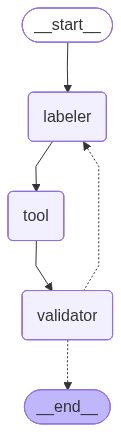

In [7]:
from IPython.display import Image, display
display(Image(graph_agent._build_graph().get_graph(xray=True).draw_mermaid_png()))

respone from LLM : content=[{'type': 'text', 'text': '```json\n{\n  "labeled_objects": [\n    {\n      "label": "robot dog",\n      "box": [\n        0.092,\n        0.073,\n        0.698,\n        1.0\n      ],\n      "valid": false\n    }\n  ]\n}\n```', 'extras': {'signature': 'EocYCoQYAdHtim8RxvY7uO7vC0NK5BwtkUlD7wEZz/1+lzpddLFILQLqHGNfgWLZCsKt3GyfVk0brbjHUhyFCeASplsNThVCDmMxZOH9gbL6hOC7I8jpobmmyU6KogT0xauXlT8zsBTF+y48pKbmO+S15ceP8UnnB//wjeICAnKgTBCLTCqnTcclNX3/nZj9dwCk7a6FqSy0Z5y250CH5WYBFBgnq1Db13rajh85wG/jrOLw7IVJF//NCkpo+tbnKGvmHVvJGtt15l3HrLXP11XeGEHxFHiZRR6NQUzi9d9wlBpPDFVn6BqxcuO+4S5qwXQUEDU5wJXvNdm8XirDlTeZCAAcSmuKKGHHXs4poGXPalob8lrwyFt0xKpjj9+NqY9zBuRFBerfz13wB96rPZffQh3xe0xtRaObZcVoABkDrGv8jqHXNWlPrKPuTmnI+QZovtFsYXBODR4w7NbHoTscbrEjbdI7Gp31ZMQj1PgLbf1YYsv9xS6iddpff8qkOxveewuppPnJ/wSWq2hWWcGRT8RHzzWQRjJRJyJlT3EnLKjBJ9zepr71TEC+s7gqppi0AVyEwhSJG6HC+O0usKH5O63VS3yMsMDb2cDXOIcezLs7avqiwdJ90ChlBvORyPx8nNphtf0OXPptsiVRaQ9ZcREQgSijJ88OtJSfnls1TUGPHAxRV9+zb/osYB9oZLbE6D6By/ZxLIT

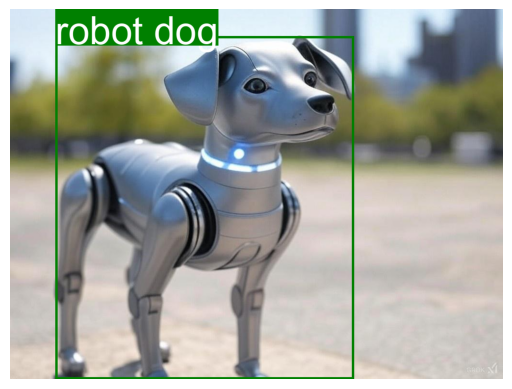

In [ ]:
graph_agent.run(image_path='./data/image.jpg', query="Label the robot dog in the image.")

In [9]:
# from mb_rag.basic import ModelFactory
# import os
# from dotenv import load_dotenv
# load_dotenv()

In [10]:
# llm = ModelFactory(model_name='gemini-3-pro-preview',model_type='google')

In [11]:
# k =llm.invoke_query('how to use thinking level in gemini 3 with langchain?')

In [12]:
# k[0]['text']